# Introduction to `cf_xarray`

This notebook is a brief introduction to `cf_xarray`'s current capabilities.


In [1]:
import cf_xarray as cfxr
import numpy as np
import xarray as xr

Lets read two datasets.


In [2]:
ds = xr.tutorial.load_dataset("air_temperature")
ds.air.attrs["standard_name"] = "air_temperature"
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

This one is inspired by POP model output and illustrates how the coordinates
attribute is interpreted. It also illustrates one way of tagging curvilinear
grids for convenient use of `cf_xarray`


In [3]:
from cf_xarray.datasets import popds as pop

pop

<xarray.Dataset>
Dimensions:  (nlat: 20, nlon: 30)
Coordinates:
    TLONG    (nlat, nlon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    TLAT     (nlat, nlon) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
    ULONG    (nlat, nlon) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5 0.5
    ULAT     (nlat, nlon) float64 2.5 2.5 2.5 2.5 2.5 ... 2.5 2.5 2.5 2.5 2.5
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    UVEL     (nlat, nlon) float64 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0 15.0
    TEMP     (nlat, nlon) float64 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0 15.0

This synthetic dataset has multiple `X` and `Y` coords. An example would be
model output on a staggered grid.


In [4]:
from cf_xarray.datasets import multiple

multiple

<xarray.Dataset>
Dimensions:  (x1: 30, x2: 10, y1: 20, y2: 5)
Coordinates:
  * x1       (x1) int64 0 1 2 3 4 5 6 7 8 9 10 ... 20 21 22 23 24 25 26 27 28 29
  * y1       (y1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * x2       (x2) int64 0 1 2 3 4 5 6 7 8 9
  * y2       (y2) int64 0 1 2 3 4
Data variables:
    v1       (x1, y1) float64 15.0 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0 15.0
    v2       (x2, y2) float64 15.0 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0 15.0

This dataset has ancillary variables


In [5]:
from cf_xarray.datasets import anc

anc

<xarray.Dataset>
Dimensions:            (x: 10, y: 20)
Dimensions without coordinates: x, y
Data variables:
    q                  (x, y) float64 -0.8845 0.7023 0.3637 ... 1.251 0.5598
    q_error_limit      (x, y) float64 0.7544 0.9793 -0.3018 ... 0.789 2.085
    q_detection_limit  float64 0.001

## What attributes have been discovered?

The criteria for identifying variables using CF attributes are listed
[here](../criteria.rst).


In [6]:
ds.lon

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

`ds.lon` has attributes `axis: X`. This means that `cf_xarray` can identify the
`'X'` axis as being represented by the `lon` variable.

It can also use the `standard_name` and `units` attributes to infer that `lon`
is "Longitude". To see variable names that `cf_xarray` can infer, use `ds.cf`


In [7]:
ds.cf

Coordinates:
- CF Axes: * X: ['lon']
           * Y: ['lat']
           * T: ['time']
             Z: n/a

- CF Coordinates: * longitude: ['lon']
                  * latitude: ['lat']
                  * time: ['time']
                    vertical: n/a

- Cell Measures:   area, volume: n/a

- Standard Names: * latitude: ['lat']
                  * longitude: ['lon']
                  * time: ['time']

- Bounds:   n/a

Data Variables:
- Cell Measures:   area, volume: n/a

- Standard Names:   air_temperature: ['air']

- Bounds:   n/a

For `pop`, only `latitude` and `longitude` are detected, not `X` or `Y`. Please
comment here: https://github.com/xarray-contrib/cf-xarray/issues/23 if you have
opinions about this behaviour.


In [8]:
pop.cf

Coordinates:
- CF Axes: * X: ['nlon']
           * Y: ['nlat']
             Z, T: n/a

- CF Coordinates:   longitude: ['TLONG', 'ULONG']
                    latitude: ['TLAT', 'ULAT']
                    vertical, time: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

Data Variables:
- Cell Measures:   area, volume: n/a

- Standard Names:   sea_water_potential_temperature: ['TEMP']
                    sea_water_x_velocity: ['UVEL']

- Bounds:   n/a

For `multiple`, multiple `X` and `Y` coordinates are detected


In [9]:
multiple.cf

Coordinates:
- CF Axes: * X: ['x1', 'x2']
           * Y: ['y1', 'y2']
             Z, T: n/a

- CF Coordinates:   longitude, latitude, vertical, time: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

Data Variables:
- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

## Feature: Accessing coordinate variables

`.cf` implements `__getitem__` to allow easy access to coordinate and axis
variables.


In [10]:
ds.cf["X"]

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

Indexing with a scalar key raises an error if the key maps to multiple variables
names


In [11]:
multiple.cf["X"]

KeyError: "Receive multiple variables for key 'X': {'x2', 'x1'}. Expected only one. Please pass a list ['X'] instead to get all variables matching 'X'."

In [12]:
pop.cf["longitude"]

KeyError: "Receive multiple variables for key 'longitude': {'TLONG', 'ULONG'}. Expected only one. Please pass a list ['longitude'] instead to get all variables matching 'longitude'."

To get back all variables associated with that key, pass a single element list
instead.


In [13]:
multiple.cf[["X"]]

<xarray.Dataset>
Dimensions:  (x1: 30, x2: 10)
Coordinates:
  * x2       (x2) int64 0 1 2 3 4 5 6 7 8 9
  * x1       (x1) int64 0 1 2 3 4 5 6 7 8 9 10 ... 20 21 22 23 24 25 26 27 28 29
Data variables:
    *empty*

In [14]:
pop.cf[["longitude"]]

<xarray.Dataset>
Dimensions:  (nlat: 20, nlon: 30)
Coordinates:
    TLONG    (nlat, nlon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    ULONG    (nlat, nlon) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5 0.5
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    *empty*

DataArrays return DataArrays


In [15]:
pop.UVEL.cf["longitude"]

<xarray.DataArray 'ULONG' (nlat: 20, nlon: 30)>
array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
...
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5]])
Coordinates:
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Attributes:
    units:    degrees_east

`Dataset.cf[...]` returns a single `DataArray`, parsing the `coordinates`
attribute if present, so we correctly get the `TLONG` variable and not the
`ULONG` variable


In [16]:
pop.cf["TEMP"]

<xarray.DataArray 'TEMP' (nlat: 20, nlon: 30)>
array([[15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
...
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.]])
Coordinates:
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    TLONG    (nlat, nlon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    TLAT     (nlat, nlon) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
Attributes:
    coordinates:    TLONG TLAT
    standard_name:  sea_water_potential_temperature

`Dataset.cf[...]` also interprets the `ancillary_variables` attribute. The
ancillary variables are returned as coordinates of a DataArray


In [17]:
anc.cf["q"]

<xarray.DataArray 'q' (x: 10, y: 20)>
array([[-0.88452638,  0.70225638,  0.36374008, -0.43522782, -1.41878937,
         1.98739874,  0.6599704 , -0.71383138,  1.25951997,  0.54618453,
        -0.80294516, -0.20333756, -0.21887168, -0.17402761, -0.65789984,
        -0.20196646,  0.82440967,  2.04289696,  0.48532522,  0.17488411],
       [-1.78154075, -0.95990013,  0.96666668, -1.84404863,  0.83351448,
        -1.2159633 , -0.63050186,  1.83753836,  1.91843568,  0.34743098,
        -1.34303345,  0.31708813, -0.09941368,  0.18866988,  0.43333814,
        -0.26161531,  1.255567  ,  1.10703665,  1.11906285,  0.49688463],
       [-1.19381753,  2.29201509,  0.08812568,  0.65242702,  0.71200912,
        -0.99880756, -2.0323667 ,  1.0848857 ,  1.5808611 , -0.07408032,
        -1.50811819, -1.26959738,  1.03192244, -0.86386406, -1.04119094,
        -1.47777459,  1.79176249, -0.51355454,  0.38236777, -0.65744829],
       [ 0.7293309 ,  0.03933844,  0.2788459 ,  1.72730513, -0.86167998,
        -1.03567675, -0.66881916,  0.05198252,  1.45626823,  0.98994801,
         0.19659471,  0.65596092, -0.82317708, -0.3382797 , -0.50768411,
         1.00026332, -1.48782609,  0.38017389,  0.4006819 , -0.89955507],
       [-0.89604653,  0.76346853,  0.03009327, -1.28835012, -1.81700604,
        -1.38239526,  1.6422113 ,  1.97806797, -1.04032648, -0.85856636,
         0.48568834, -0.07892075, -1.51699968,  1.00171227,  1.11401484,
         0.44397562,  0.54905125, -0.93236103,  0.03667694, -0.76952   ],
       [-1.10216941, -1.15462883, -1.04250482,  0.34099741, -0.62213114,
         1.1585131 ,  0.33040023, -1.09273193, -2.22507406, -0.63056312,
         0.23565081, -0.56300974, -2.34020938, -0.52520968,  0.95957475,
        -0.96888054, -0.0982907 , -0.21315907,  0.77967508,  0.21078384],
       [-1.31688489,  0.55950219,  0.25441978,  1.90253894,  0.62012454,
         0.32746634, -0.32361543,  0.74066961, -0.9970864 ,  0.43048043,
        -1.08496851, -0.25723889, -0.77768234, -0.29070803, -0.95458774,
        -1.29940943, -0.90705965,  1.68409273,  1.510595  , -1.45018046],
       [-0.80995649, -0.27149378, -1.16454183,  2.28246198,  0.83705549,
         0.20252753,  0.95566068,  0.68100315, -0.06712679,  0.28062729,
        -1.00389891,  0.5293837 ,  0.13954712, -0.91189397, -0.40860261,
        -2.43062729,  0.28383934,  2.4095333 , -0.75217053, -0.41859799],
       [ 0.68501379,  1.16445835,  0.13044395,  0.15320145, -0.030409  ,
        -1.89478905,  0.75612917,  0.9765171 , -0.10615424,  0.28374469,
        -0.89978424, -1.3419567 ,  0.74865428,  0.37091276, -0.21177972,
        -0.72148249,  0.3852948 ,  0.52989004, -0.24253753, -0.15474567],
       [ 0.47969028,  0.8644607 ,  0.78646543, -0.26932784,  0.32902154,
        -0.08314451, -1.92595332, -0.57317448, -1.0761795 , -0.19293119,
        -0.06697691, -1.00733604, -0.91789223, -0.50156339,  0.69058554,
        -0.78368437, -0.77617448, -0.68667029,  1.25086156,  0.55976384]])
Coordinates:
    q_error_limit      (x, y) float64 0.7544 0.9793 -0.3018 ... 0.789 2.085
    q_detection_limit  float64 0.001
Dimensions without coordinates: x, y
Attributes:
    standard_name:        specific_humidity
    units:                g/g
    ancillary_variables:  q_error_limit q_detection_limit

## Feature: Accessing variables by standard names


In [18]:
pop.cf[["sea_water_potential_temperature", "UVEL"]]

<xarray.Dataset>
Dimensions:  (nlat: 20, nlon: 30)
Coordinates:
    TLONG    (nlat, nlon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    TLAT     (nlat, nlon) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
    ULONG    (nlat, nlon) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5 0.5
    ULAT     (nlat, nlon) float64 2.5 2.5 2.5 2.5 2.5 ... 2.5 2.5 2.5 2.5 2.5
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    TEMP     (nlat, nlon) float64 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0 15.0
    UVEL     (nlat, nlon) float64 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0 15.0

Note that ancillary variables are included as coordinate variables


In [19]:
anc.cf["specific_humidity"]

<xarray.DataArray 'q' (x: 10, y: 20)>
array([[-0.88452638,  0.70225638,  0.36374008, -0.43522782, -1.41878937,
         1.98739874,  0.6599704 , -0.71383138,  1.25951997,  0.54618453,
        -0.80294516, -0.20333756, -0.21887168, -0.17402761, -0.65789984,
        -0.20196646,  0.82440967,  2.04289696,  0.48532522,  0.17488411],
       [-1.78154075, -0.95990013,  0.96666668, -1.84404863,  0.83351448,
        -1.2159633 , -0.63050186,  1.83753836,  1.91843568,  0.34743098,
        -1.34303345,  0.31708813, -0.09941368,  0.18866988,  0.43333814,
        -0.26161531,  1.255567  ,  1.10703665,  1.11906285,  0.49688463],
       [-1.19381753,  2.29201509,  0.08812568,  0.65242702,  0.71200912,
        -0.99880756, -2.0323667 ,  1.0848857 ,  1.5808611 , -0.07408032,
        -1.50811819, -1.26959738,  1.03192244, -0.86386406, -1.04119094,
        -1.47777459,  1.79176249, -0.51355454,  0.38236777, -0.65744829],
       [ 0.7293309 ,  0.03933844,  0.2788459 ,  1.72730513, -0.86167998,
        -1.03567675, -0.66881916,  0.05198252,  1.45626823,  0.98994801,
         0.19659471,  0.65596092, -0.82317708, -0.3382797 , -0.50768411,
         1.00026332, -1.48782609,  0.38017389,  0.4006819 , -0.89955507],
       [-0.89604653,  0.76346853,  0.03009327, -1.28835012, -1.81700604,
        -1.38239526,  1.6422113 ,  1.97806797, -1.04032648, -0.85856636,
         0.48568834, -0.07892075, -1.51699968,  1.00171227,  1.11401484,
         0.44397562,  0.54905125, -0.93236103,  0.03667694, -0.76952   ],
       [-1.10216941, -1.15462883, -1.04250482,  0.34099741, -0.62213114,
         1.1585131 ,  0.33040023, -1.09273193, -2.22507406, -0.63056312,
         0.23565081, -0.56300974, -2.34020938, -0.52520968,  0.95957475,
        -0.96888054, -0.0982907 , -0.21315907,  0.77967508,  0.21078384],
       [-1.31688489,  0.55950219,  0.25441978,  1.90253894,  0.62012454,
         0.32746634, -0.32361543,  0.74066961, -0.9970864 ,  0.43048043,
        -1.08496851, -0.25723889, -0.77768234, -0.29070803, -0.95458774,
        -1.29940943, -0.90705965,  1.68409273,  1.510595  , -1.45018046],
       [-0.80995649, -0.27149378, -1.16454183,  2.28246198,  0.83705549,
         0.20252753,  0.95566068,  0.68100315, -0.06712679,  0.28062729,
        -1.00389891,  0.5293837 ,  0.13954712, -0.91189397, -0.40860261,
        -2.43062729,  0.28383934,  2.4095333 , -0.75217053, -0.41859799],
       [ 0.68501379,  1.16445835,  0.13044395,  0.15320145, -0.030409  ,
        -1.89478905,  0.75612917,  0.9765171 , -0.10615424,  0.28374469,
        -0.89978424, -1.3419567 ,  0.74865428,  0.37091276, -0.21177972,
        -0.72148249,  0.3852948 ,  0.52989004, -0.24253753, -0.15474567],
       [ 0.47969028,  0.8644607 ,  0.78646543, -0.26932784,  0.32902154,
        -0.08314451, -1.92595332, -0.57317448, -1.0761795 , -0.19293119,
        -0.06697691, -1.00733604, -0.91789223, -0.50156339,  0.69058554,
        -0.78368437, -0.77617448, -0.68667029,  1.25086156,  0.55976384]])
Coordinates:
    q_error_limit      (x, y) float64 0.7544 0.9793 -0.3018 ... 0.789 2.085
    q_detection_limit  float64 0.001
Dimensions without coordinates: x, y
Attributes:
    standard_name:        specific_humidity
    units:                g/g
    ancillary_variables:  q_error_limit q_detection_limit

## Feature: Utility functions

There are some utility functions to allow use by downstream libraries


In [20]:
pop.cf.keys()

{'X',
 'Y',
 'latitude',
 'longitude',
 'sea_water_potential_temperature',
 'sea_water_x_velocity'}

You can test for presence of these keys


In [21]:
"sea_water_x_velocity" in pop.cf

True

You can also get out the available Axis names


In [22]:
pop.cf.axes

{'X': ['nlon'], 'Y': ['nlat']}

or available Coordinate names. Same for cell measures (`.cf.cell_measures`) and
standard names (`.cf.standard_names`).


In [23]:
pop.cf.coordinates

{'longitude': ['TLONG', 'ULONG'], 'latitude': ['TLAT', 'ULAT']}

**Note:** Although it is possible to assign additional coordinates,
`.cf.coordinates` only returns a subset of
`("longitude", "latitude", "vertical", "time")`.


## Feature: Rewriting property dictionaries

`cf_xarray` will rewrite the `.sizes` and `.chunks` dictionaries so that one can
index by a special CF axis or coordinate name


In [24]:
ds.cf.sizes

{'latitude': 25, 'Y': 25, 'longitude': 53, 'X': 53, 'T': 2920, 'time': 2920}

Note the duplicate entries above:

1. One for `X`, `Y`, `T`
2. and one for `longitude`, `latitude` and `time`.

An error is raised if there are multiple `'X'` variables (for example)


In [25]:
multiple.cf.sizes

AttributeError: cf_xarray can't wrap attribute 'sizes' because there are multiple values for 'X'. There is no unique mapping from 'X' to a value in 'sizes'.

In [26]:
multiple.v1.cf.sizes

{'X': 30, 'Y': 20}

## Feature: Renaming variables

`cf_xarray` lets you rewrite variables in one dataset to like variables in
another dataset.

In this example, a one-to-one mapping is not possible and the coordinate
variables are not renamed.


In [27]:
da = pop.cf["TEMP"]
da.cf.rename_like(ds)

/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/cf_xarray/accessor.py:1354: UserWarning: Conflicting variables skipped:
['TLAT']: ['lat'] (latitude)
['TLONG']: ['lon'] (longitude)
['nlat']: ['lat'] (Y)
['nlon']: ['lon'] (X)
  warnings.warn(


<xarray.DataArray 'TEMP' (nlat: 20, nlon: 30)>
array([[15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
...
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.]])
Coordinates:
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    TLONG    (nlat, nlon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    TLAT     (nlat, nlon) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
Attributes:
    coordinates:    TLONG TLAT
    standard_name:  sea_water_potential_temperature

If we exclude all axes (variables with `axis` attribute), a one-to-one mapping
is possible. In this example, `TLONG` and `TLAT` are renamed to `lon` and `lat`
i.e. their counterparts in `ds`. Note the the `coordinates` attribute is
appropriately changed.


In [28]:
da.cf.rename_like(ds, skip="axes")

<xarray.DataArray 'TEMP' (nlat: 20, nlon: 30)>
array([[15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
...
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15.]])
Coordinates:
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    lon      (nlat, nlon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    lat      (nlat, nlon) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
Attributes:
    coordinates:    lon lat
    standard_name:  sea_water_potential_temperature

## Feature: Rewriting arguments

`cf_xarray` can rewrite arguments for a large number of xarray functions. By
this I mean that instead of specifing say `dim="lon"`, you can pass `dim="X"` or
`dim="longitude"` and `cf_xarray` will rewrite that to `dim="lon"` based on the
attributes present in the dataset.

Here are a few examples


### Slicing


In [29]:
ds.air.cf.isel(T=1)

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
        235.79999],
       [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
        235.7    ],
       [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
        238.5    ],
       ...,
       [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
        294.79   ],
       [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
        295.1    ],
       [296.29   , 297.19998, 297.4    , ..., 296.4    , 296.4    ,
        296.6    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01T06:00:00
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [185.16 322.1 ]
    standard_name:  air_temperature

Slicing works will expand a single key like `X` to multiple dimensions if those
dimensions are tagged with `axis: X`


In [30]:
multiple.cf.isel(X=1, Y=1)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    x1       int64 1
    y1       int64 1
    x2       int64 1
    y2       int64 1
Data variables:
    v1       float64 15.0
    v2       float64 15.0

### Reductions


In [31]:
ds.air.cf.mean("X")

<xarray.DataArray 'air' (time: 2920, lat: 25)>
array([[242.046  , 241.95865, 243.7264 , ..., 295.6587 , 296.7093 ,
        297.91714],
       [241.71301, 241.64018, 243.40411, ..., 295.3115 , 296.39224,
        297.61868],
       [241.9834 , 241.08849, 243.24734, ..., 295.15228, 296.14716,
        297.31244],
       ...,
       [244.40886, 243.10132, 246.49377, ..., 296.44473, 297.27115,
        298.25415],
       [244.75415, 243.0485 , 246.21265, ..., 296.14093, 297.1598 ,
        298.2636 ],
       [245.48622, 242.95416, 245.45602, ..., 296.99188, 297.94662,
        298.77115]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

Expanding to multiple dimensions is also supported


In [32]:
# takes the mean along ["x1", "x2"]
multiple.cf.mean("X")

<xarray.Dataset>
Dimensions:  (y1: 20, y2: 5)
Coordinates:
  * y1       (y1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * y2       (y2) int64 0 1 2 3 4
Data variables:
    v1       (y1) float64 15.0 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0 15.0 15.0
    v2       (y2) float64 15.0 15.0 15.0 15.0 15.0

### Plotting


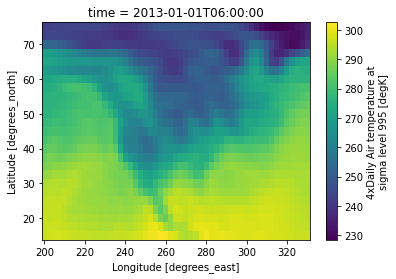

In [33]:
ds.air.cf.isel(time=1).cf.plot(x="X", y="Y")

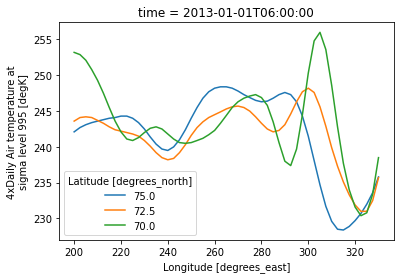

In [34]:
ds.air.cf.isel(T=1, Y=[0, 1, 2]).cf.plot(x="longitude", hue="latitude")

`cf_xarray` can facet


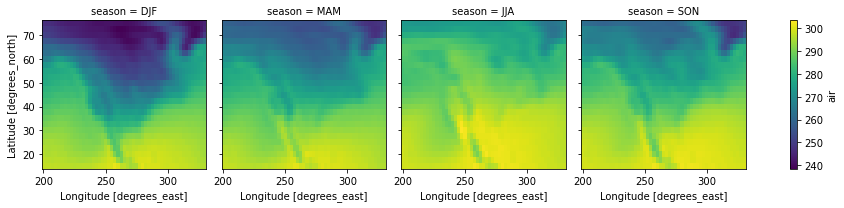

In [35]:
seasonal = (
    ds.air.groupby("time.season")
    .mean()
    .reindex(season=["DJF", "MAM", "JJA", "SON"])
)
seasonal.cf.plot(x="longitude", y="latitude", col="season")

### Resample & groupby


In [36]:
ds.cf.resample(T="D").mean()

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 730)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2014-12-31
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Data variables:
    air      (time, lat, lon) float32 241.9 242.3 242.7 ... 296.2 295.9 295.5

`cf_xarray` also understands the "datetime accessor" syntax for groupby


In [37]:
ds.cf.groupby("T.month").mean("longitude")

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float32 242.0 242.0 243.7 251.2 ... 297.0 297.9 298.8

### Rolling & coarsen


In [38]:
ds.cf.rolling(X=5).mean()

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan ... 297.7 297.0 296.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

`coarsen` works but everything later will break because of xarray bug
https://github.com/pydata/xarray/issues/4120

`ds.isel(lon=slice(50)).cf.coarsen(Y=5, X=10).mean()`


## Feature: mix "special names" and variable names


In [39]:
ds.cf.groupby("T.month").mean(["lat", "X"])

<xarray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time) float32 274.2 273.5 273.2 273.6 ... 273.9 273.0 273.0 273.4

## Feature: Weight by Cell Measures

`cf_xarray` can weight by cell measure variables if the appropriate attribute is
set


In [40]:
# Lets make some weights (not sure if this is right)
ds.coords["cell_area"] = (
    np.cos(ds.air.cf["latitude"] * np.pi / 180)
    * xr.ones_like(ds.air.cf["longitude"])
    * 105e3
    * 110e3
)
# and set proper attributes
ds.air.attrs["cell_measures"] = "area: cell_area"

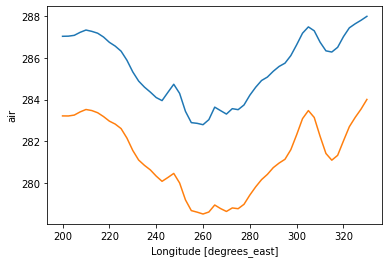

In [41]:
ds.air.cf.weighted("area").mean(["latitude", "time"]).cf.plot(x="longitude")
ds.air.mean(["lat", "time"]).cf.plot(x="longitude")

## Feature: Cell boundaries and vertices

`cf_xarray` can infer cell boundaries (for rectilinear grids) and convert
CF-standard bounds variables to vertices.


In [42]:
ds_bnds = ds.cf.add_bounds(["lat", "lon"])
ds_bnds

<xarray.Dataset>
Dimensions:     (bounds: 2, lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat         (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon         (lon) float64 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time        (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
    cell_area   (lat, lon) float32 2.989e+09 2.989e+09 ... 1.116e+10 1.116e+10
    lon_bounds  (bounds, lon) float32 198.8 201.2 203.8 ... 326.2 328.8 331.2
    lat_bounds  (bounds, lat) float32 76.25 73.75 71.25 ... 18.75 16.25 13.75
Dimensions without coordinates: bounds
Data variables:
    air         (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

We can also convert each bounds variable independently with the top-level
functions


In [43]:
lat_bounds = ds_bnds.cf.get_bounds("latitude")

lat_vertices = cfxr.bounds_to_vertices(lat_bounds, bounds_dim="bounds")
lat_vertices

<xarray.DataArray (lat_vertices: 26)>
array([76.25, 73.75, 71.25, 68.75, 66.25, 63.75, 61.25, 58.75, 56.25,
       53.75, 51.25, 48.75, 46.25, 43.75, 41.25, 38.75, 36.25, 33.75,
       31.25, 28.75, 26.25, 23.75, 21.25, 18.75, 16.25, 13.75],
      dtype=float32)
Dimensions without coordinates: lat_vertices

In [44]:
# Or we can convert _all_ bounds variables on a dataset
ds_crns = ds_bnds.cf.bounds_to_vertices()
ds_crns

<xarray.Dataset>
Dimensions:       (bounds: 2, lat: 25, lat_vertices: 26, lon: 53, lon_vertices: 54, time: 2920)
Coordinates:
  * lat           (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon           (lon) float64 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time          (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
    cell_area     (lat, lon) float32 2.989e+09 2.989e+09 ... 1.116e+10 1.116e+10
    lon_bounds    (bounds, lon) float32 198.8 201.2 203.8 ... 326.2 328.8 331.2
    lat_bounds    (bounds, lat) float32 76.25 73.75 71.25 ... 18.75 16.25 13.75
  * lat_vertices  (lat_vertices) float32 76.25 73.75 71.25 ... 18.75 16.25 13.75
  * lon_vertices  (lon_vertices) float32 198.8 201.2 203.8 ... 326.2 328.8 331.2
Dimensions without coordinates: bounds
Data variables:
    air           (time, lat, lon) float32 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...